## Libraries Imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
import re
%matplotlib inline

## Helper Functions


In [5]:
def evaluate_model(y_test, y_pred, model="", train=False):
    f1 = f1_score(y_test, y_pred)
    p  = precision_score(y_test, y_pred)
    r  = recall_score(y_test, y_pred)
    a  = accuracy_score(y_test, y_pred)
    if(train):
        print(f"Train eval ==> model: {model}, f1 score: {f1:0.4f}, precision: {p:0.4f}, recall: {r:0.4f}, accuracy: {a:0.4f}")
    else:
        print(f"Test eval  ==> model: {model}, f1 score: {f1:0.4f}, precision: {p:0.4f}, recall: {r:0.4f}, accuracy: {a:0.4f}")

def plot_confusion_matrix(y_test, y_pred, model=""):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Oranges', fmt='d')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model} Confusion Matrix')
    plt.show()

def plot_feature_importance(labels, importance, model=""):
    max_value = np.max(importance)
    importance_scaled = importance / max_value
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation='vertical', fontsize=12)
    ax.bar(labels, importance_scaled)
    ax.set_xticklabels(labels, rotation='vertical', fontsize=12)
    ax.set_xlabel('Features', fontsize=14)
    ax.set_ylabel('Importance', fontsize=14)
    ax.set_title(model + ' Feature Importance Plot', fontsize=16, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.subplots_adjust(bottom=0.3)

## Malware Distribution

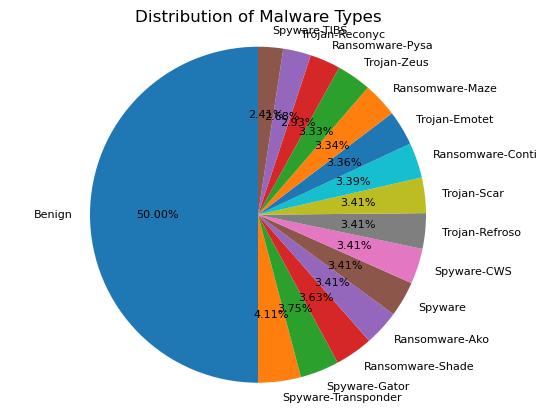

In [6]:
df = pd.read_csv('Obfuscated-MalMem2022.csv')

sub_familles = df.apply(lambda x: re.split(r"-([a-z]|[0-9]).*", x['Category'])[0], axis=1)
df['Category'] = sub_familles

category_counts = df['Category'].value_counts().to_dict()

plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.2f%%', startangle=90, textprops={'fontsize': 8})
plt.axis('equal')
plt.title('Distribution of Malware Types', fontsize=12)
plt.show()

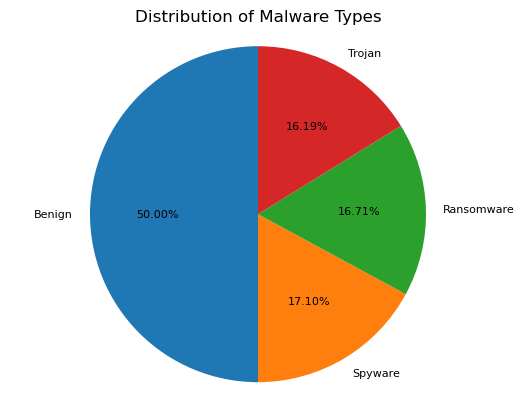

In [7]:
familles = df.apply(lambda x: x[0].split('-')[0], axis=1)
df['Category'] = familles

category_counts = df['Category'].value_counts().to_dict()

plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.2f%%', startangle=90, textprops={'fontsize': 8})
plt.axis('equal')
plt.title('Distribution of Malware Types', fontsize=12)
plt.show()

## EDA

In [8]:
df = df.drop(['Category'], axis=1)
# labels = df.columns.tolist()

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

labels = df.columns[:-1].tolist()

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, shuffle=True)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Single Classifier Models

### Random Forest

Train eval ==> model: RF, f1 score: 1.0000, precision: 1.0000, recall: 1.0000, accuracy: 1.0000
Test eval  ==> model: RF, f1 score: 0.9999, precision: 1.0000, recall: 0.9999, accuracy: 0.9999


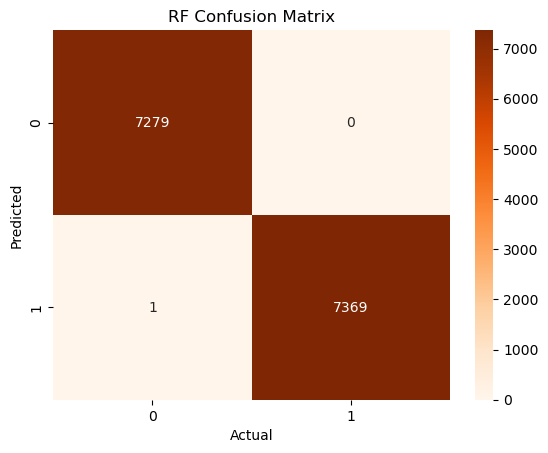

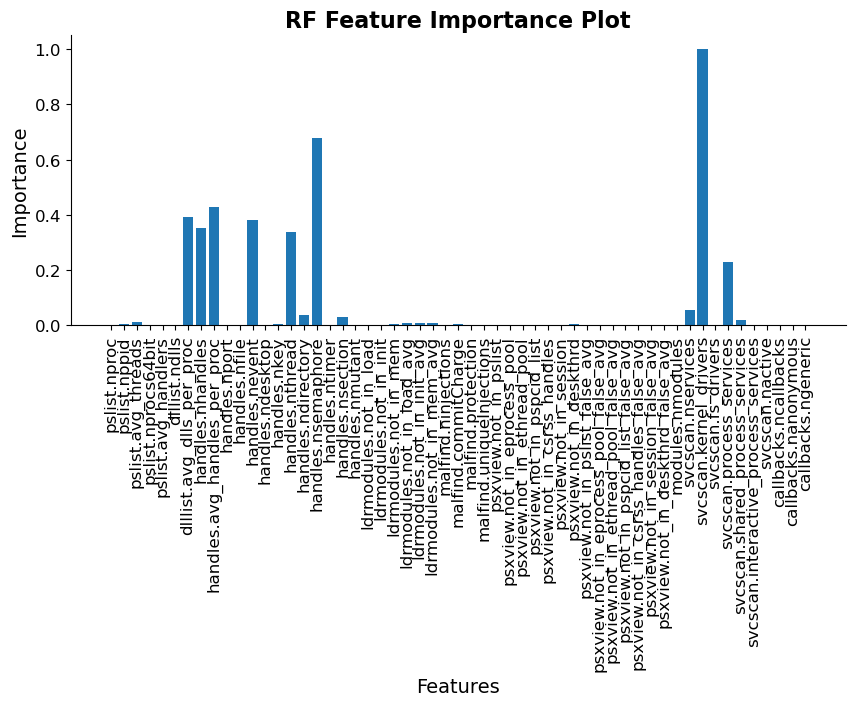

In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_train)
evaluate_model(y_train, y_pred, model="RF", train=True)

y_pred = classifier.predict(X_test)
evaluate_model(y_test, y_pred, model="RF", train=False)

plot_confusion_matrix(y_test, y_pred, model="RF")

importance = classifier.feature_importances_

plot_feature_importance(labels, importance, model="RF")

### Naive Bayes

Train eval ==> model: NB, f1 score: 0.9926, precision: 0.9891, recall: 0.9961, accuracy: 0.9926
Test eval  ==> model: NB, f1 score: 0.9929, precision: 0.9899, recall: 0.9959, accuracy: 0.9928


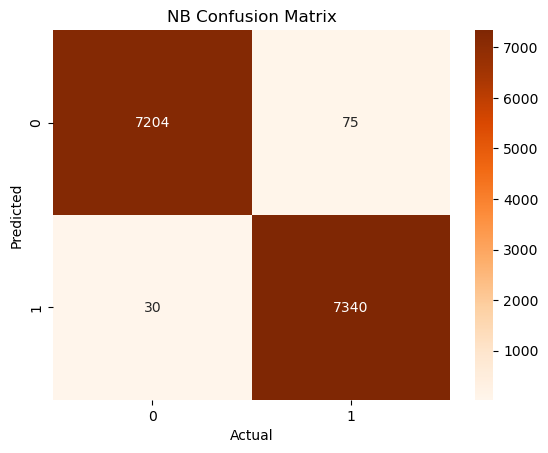

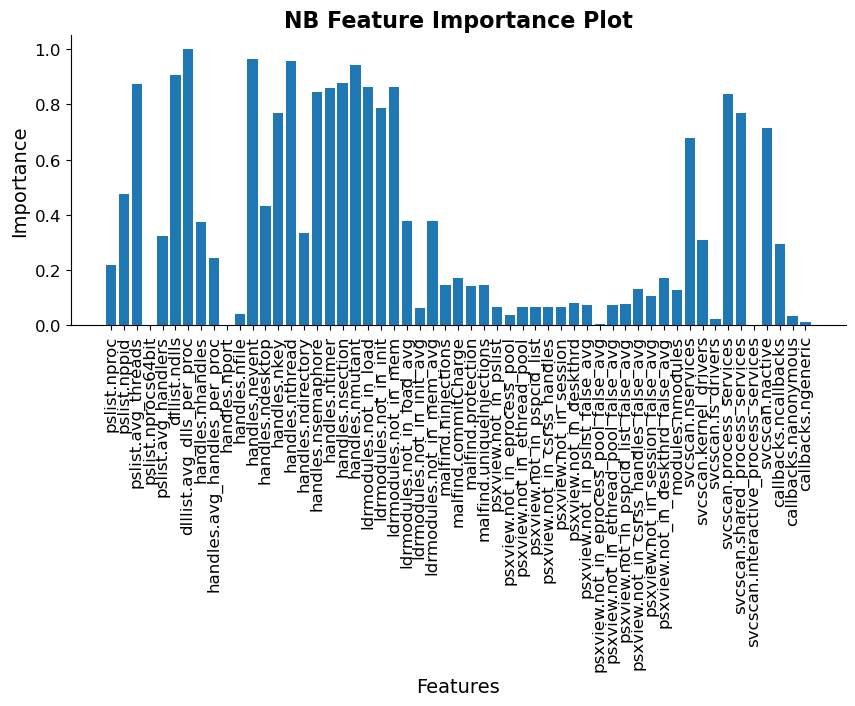

In [32]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_train)
evaluate_model(y_train, y_pred, model="NB", train=True)

y_pred = classifier.predict(X_test)
evaluate_model(y_test, y_pred, model="NB", train=False)

plot_confusion_matrix(y_test, y_pred, model="NB")

from sklearn.inspection import permutation_importance

class_mean = classifier.theta_
class_diff = np.abs(np.diff(class_mean, axis=0))
importance = np.sum(class_diff, axis=0)

plot_feature_importance(labels, importance, model="NB")

### Decision Tree

Train eval ==> model: DT, f1 score: 1.0000, precision: 1.0000, recall: 1.0000, accuracy: 1.0000
Test eval  ==> model: DT, f1 score: 0.9997, precision: 1.0000, recall: 0.9995, accuracy: 0.9997


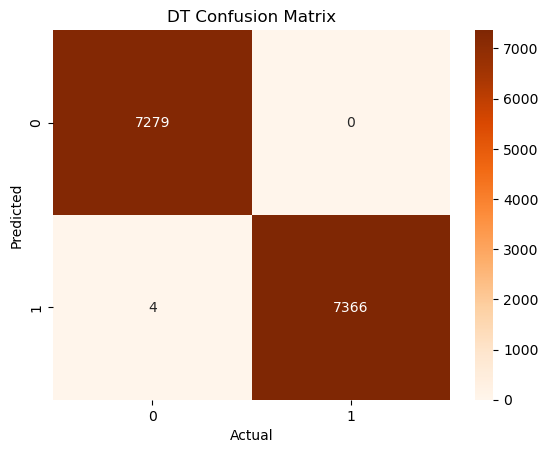

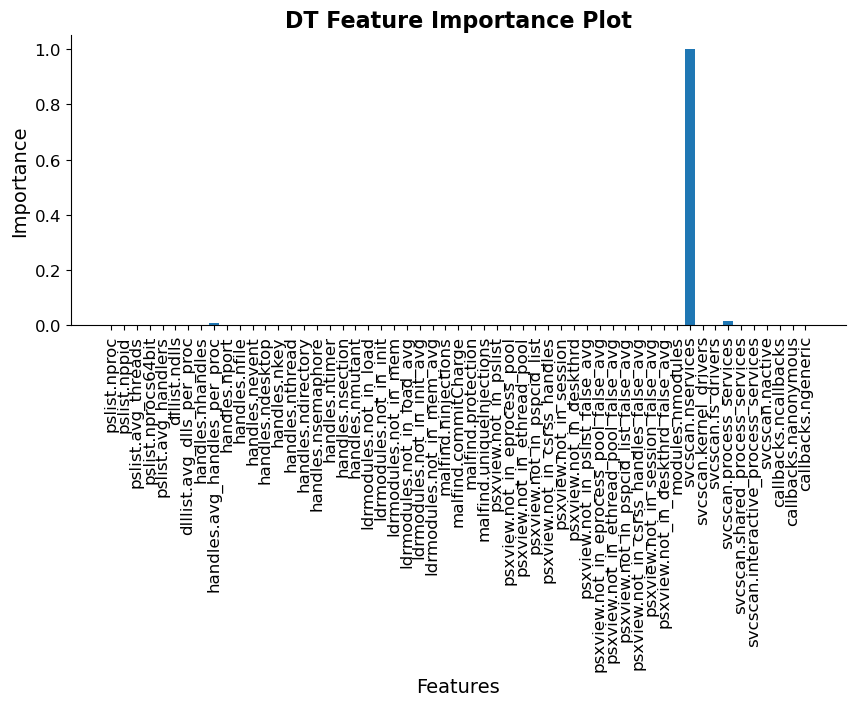

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_train)
evaluate_model(y_train, y_pred, model="DT", train=True)

y_pred = classifier.predict(X_test)
evaluate_model(y_test, y_pred, model="DT", train=False)

plot_confusion_matrix(y_test, y_pred, model="DT")

importance = classifier.feature_importances_

plot_feature_importance(labels, importance, model="DT")

### SVM

Train eval ==> model: SVM, f1 score: 0.9998, precision: 0.9997, recall: 0.9999, accuracy: 0.9998
Test eval  ==> model: SVM, f1 score: 0.9999, precision: 0.9997, recall: 1.0000, accuracy: 0.9999


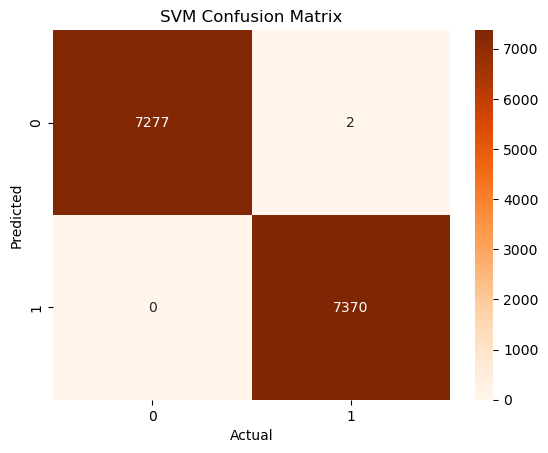

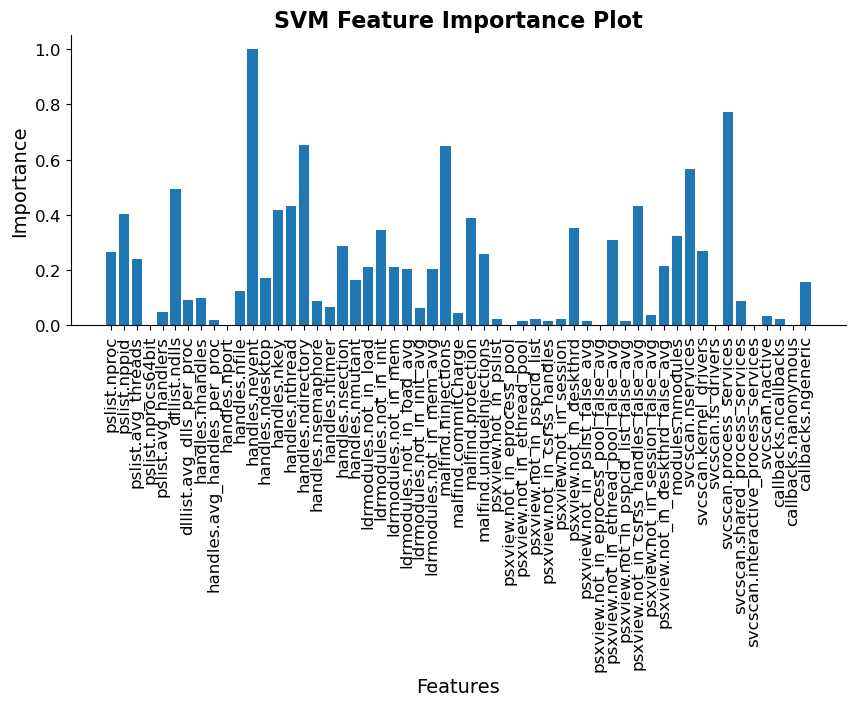

In [34]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_train)
evaluate_model(y_train, y_pred,model="SVM", train=True)

y_pred = classifier.predict(X_test)
evaluate_model(y_test, y_pred,model="SVM", train=False)

plot_confusion_matrix(y_test, y_pred, model="SVM")

importance = np.abs(classifier.coef_)[0]

plot_feature_importance(labels, importance, model="SVM")

### Logistic Regression

Train eval ==> model: LP, f1 score: 0.9987, precision: 0.9992, recall: 0.9982, accuracy: 0.9987
Test eval  ==> model: LP, f1 score: 0.9986, precision: 0.9993, recall: 0.9980, accuracy: 0.9986


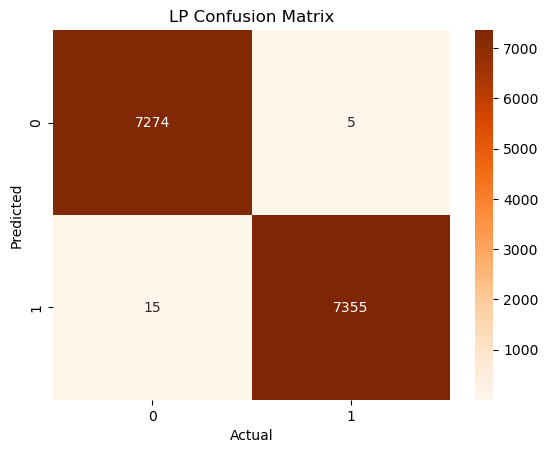

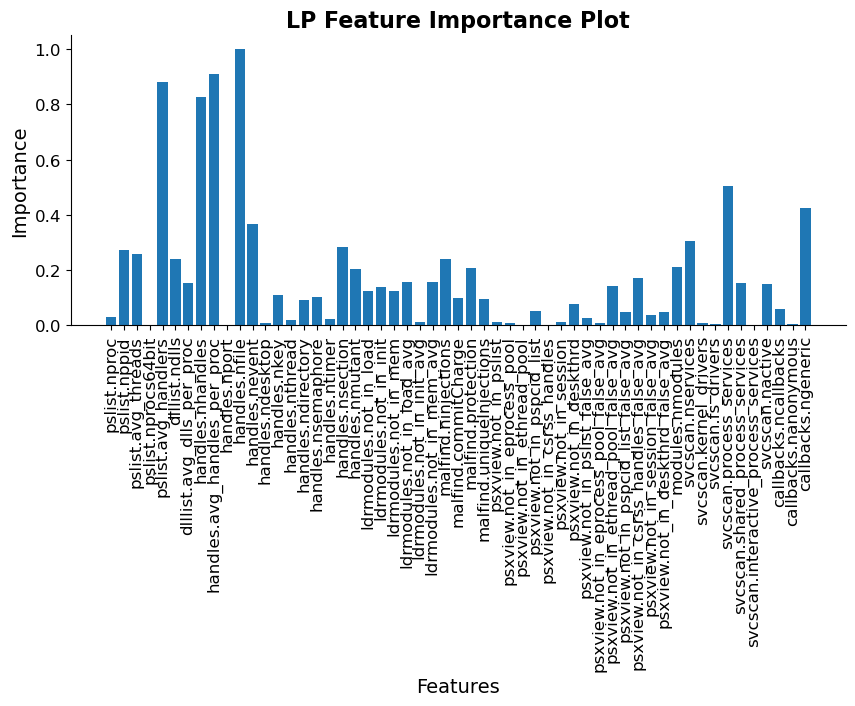

In [35]:
from sklearn.linear_model import Perceptron
classifier = Perceptron(random_state = 42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_train)
evaluate_model(y_train, y_pred,model="LP", train=True)

y_pred = classifier.predict(X_test)
evaluate_model(y_test, y_pred,model="LP", train=False)

plot_confusion_matrix(y_test, y_pred, model="LP")

importance = np.abs(classifier.coef_)[0]

plot_feature_importance(labels, importance, model="LP")

### KNN

Train eval ==> model: KNN, f1 score: 0.9997, precision: 0.9998, recall: 0.9996, accuracy: 0.9997
Test eval  ==> model: KNN, f1 score: 0.9997, precision: 0.9997, recall: 0.9996, accuracy: 0.9997


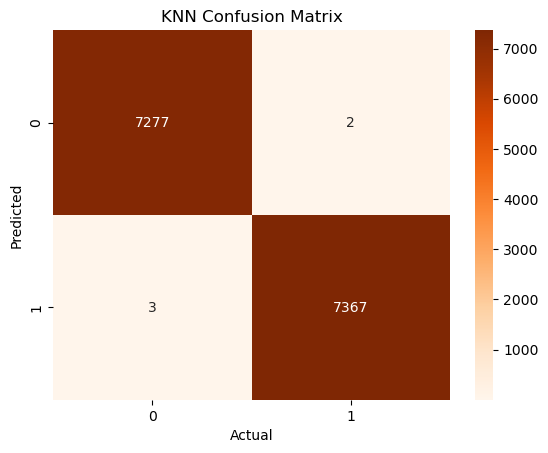

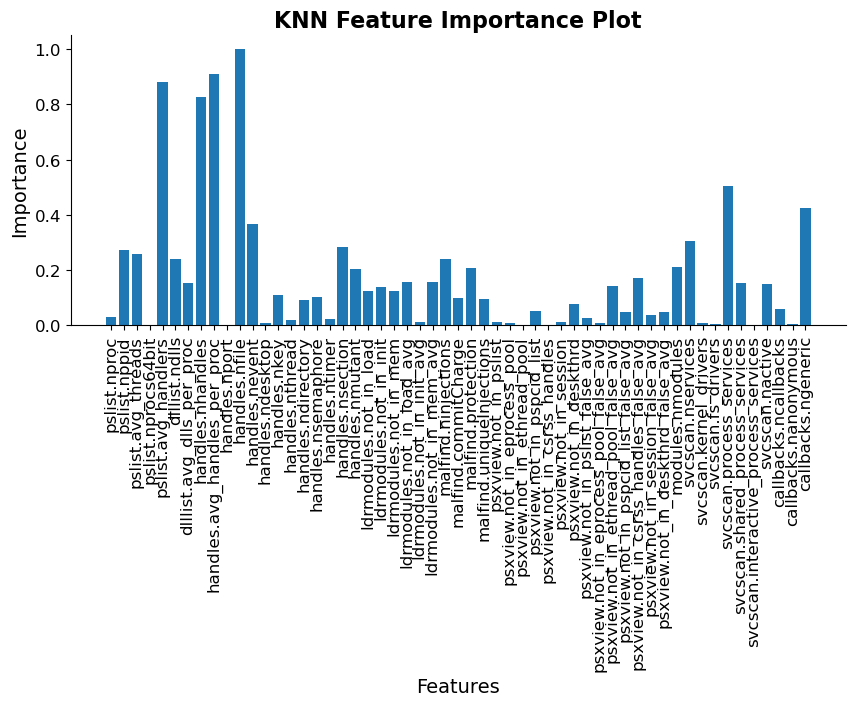

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_train)
evaluate_model(y_train, y_pred,model="KNN", train=True)

y_pred = classifier.predict(X_test)
evaluate_model(y_test, y_pred,model="KNN", train=False)

plot_confusion_matrix(y_test, y_pred, model="KNN")

from sklearn.inspection import permutation_importance

result = permutation_importance(classifier, X, y, n_repeats=10)

importances = result.importances_mean

indices = importances.argsort()[::-1]
importances = importances[indices]

plot_feature_importance(labels, importance, model="KNN")

## Ensemble Models

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

### Model 1

Train eval ==> model: stackingclf1, f1 score: 1.0000, precision: 1.0000, recall: 1.0000, accuracy: 1.0000
Test eval  ==> model: stackingclf1, f1 score: 0.9997, precision: 1.0000, recall: 0.9995, accuracy: 0.9997


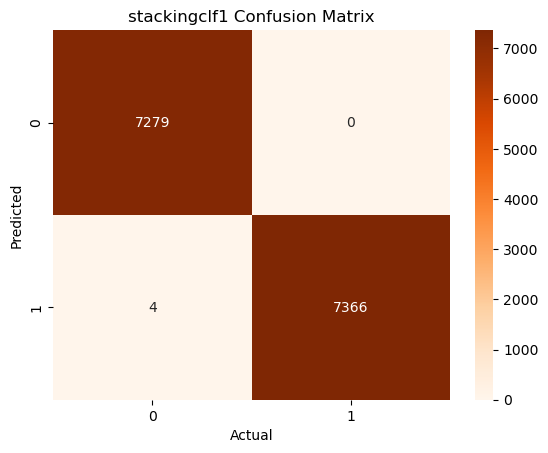

In [15]:
classifierNB_1  = GaussianNB()
classifierLP_1  = Perceptron(random_state = 42)
classifierDT_1  = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifierSVM_1 = SVC(kernel = 'linear', random_state = 42)

stackingclf1 = StackingClassifier(estimators=[('blearner1', classifierNB_1), ('blearner2', classifierLP_1), ('blearner3', classifierDT_1)], final_estimator=classifierSVM_1)

stackingclf1.fit(X_train, y_train)

y_pred = stackingclf1.predict(X_train)
evaluate_model(y_train, y_pred,model="stackingclf1", train=True)

y_pred = stackingclf1.predict(X_test)
evaluate_model(y_test, y_pred,model="stackingclf1", train=False)

plot_confusion_matrix(y_test, y_pred, model="stackingclf1")

### Model 2

Train eval ==> model: stackingclf2, f1 score: 0.9990, precision: 0.9997, recall: 0.9983, accuracy: 0.9990
Test eval  ==> model: stackingclf2, f1 score: 0.9989, precision: 0.9996, recall: 0.9982, accuracy: 0.9989


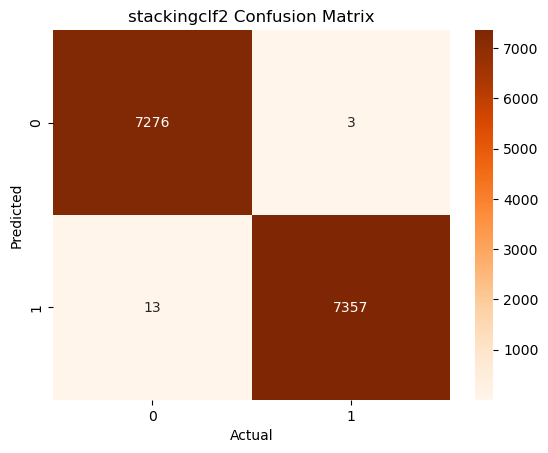

In [14]:
classifierDT_2  = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifierSVM_2 = SVC(kernel = 'linear', random_state = 42)
classifierLP_2  = Perceptron(random_state = 42)
classifierKNN_2 = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)

stackingclf2 = StackingClassifier(estimators=[('blearner1', classifierSVM_2), ('blearner2', classifierLP_2), ('blearner3', classifierDT_2)], final_estimator=classifierKNN_2)

stackingclf2.fit(X_train, y_train)

y_pred = stackingclf2.predict(X_train)
evaluate_model(y_train, y_pred,model="stackingclf2", train=True)

y_pred = stackingclf2.predict(X_test)
evaluate_model(y_test, y_pred,model="stackingclf2", train=False)

plot_confusion_matrix(y_test, y_pred, model="stackingclf2")

### Model 3

Train eval ==> model: stackingclf3, f1 score: 1.0000, precision: 1.0000, recall: 1.0000, accuracy: 1.0000
Test eval  ==> model: stackingclf3, f1 score: 1.0000, precision: 1.0000, recall: 1.0000, accuracy: 1.0000


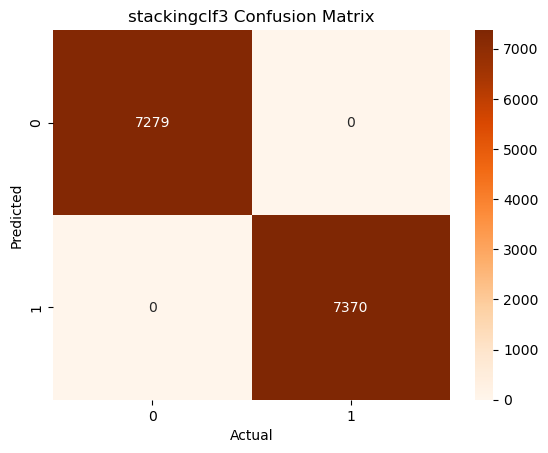

In [13]:
classifierNB_3  = GaussianNB()
classifierLP_3  = Perceptron(random_state = 42)
classifierRF_3  = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifierLR_3  = LogisticRegression(random_state=42)

stackingclf3 = StackingClassifier(estimators=[('blearner1', classifierNB_3), ('blearner2', classifierLP_3), ('blearner3', classifierRF_3)], final_estimator=classifierLR_3)

stackingclf3.fit(X_train, y_train)

y_pred = stackingclf3.predict(X_train)
evaluate_model(y_train, y_pred,model="stackingclf3", train=True)

y_pred = stackingclf3.predict(X_test)
evaluate_model(y_test, y_pred,model="stackingclf3", train=False)

plot_confusion_matrix(y_test, y_pred, model="stackingclf3")

### Model 4

Train eval ==> model: stackingclf4, f1 score: 1.0000, precision: 1.0000, recall: 1.0000, accuracy: 1.0000
Test eval  ==> model: stackingclf4, f1 score: 0.9999, precision: 1.0000, recall: 0.9997, accuracy: 0.9999


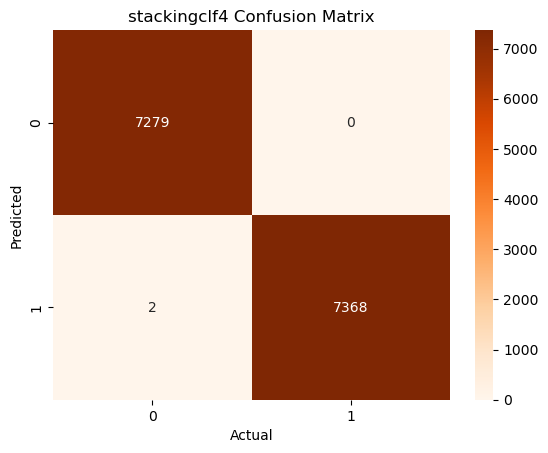

In [12]:
classifierRF_4  = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifierNB_4  = GaussianNB()
classifierDT_4  = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifierLR_4  = LogisticRegression(random_state=42)

stackingclf4 = StackingClassifier(estimators=[('blearner1', classifierNB_4), ('blearner2', classifierRF_4), ('blearner3', classifierDT_4)], final_estimator=classifierLR_4)

stackingclf4.fit(X_train, y_train)

y_pred = stackingclf4.predict(X_train)
evaluate_model(y_train, y_pred,model="stackingclf4", train=True)

y_pred = stackingclf4.predict(X_test)
evaluate_model(y_test, y_pred,model="stackingclf4", train=False)

plot_confusion_matrix(y_test, y_pred, model="stackingclf4")